# Stock Price Forecasting Using Machine Learning Strategies

## 1. Introduction
<div style="text-align: justify">Stock price forecasting is important in finance and economics, but it has been regarded as one of the most challenging applications. Numeral models have been developed to provide more accurate predictions (Pai and Lin, 2004; Aderemi et al., 2004; Lee et al., 2007; Hiransha et al., 2019 etc.). Three different methods were implemented to predict the stock price using Microsoft historical stock price. The first method was seasonal Autoregressive Integrated Moving Average (SARIMA) model, which is one of the most widely used model traditionally. The second model was Recurrent Neural Network (RNN) which is considered as non-linear statistical data tool and it can learn the underlying patterns from the data (Jabin, 2014; Rather et al., 2015; Hiransha et al., 2018). The third model is Prophet from Facebook which is developed very recently (Tylor and Letham, 2017). Predictions from each model compared to the actual stock price and model evaluation metrics were used to compare the different models.</div>

## 2. Objectives
<div style="text-align: justify">The objective of this project is to predict stock price using historical stock price data. Three different methods will be introduced and the prediction results from each model will be evaluated and compared to choose the most suitable stock price prediction model from the given data set.</div> 

## 3. Data
Historical stock prices of Microsoft for the past 10 years (from July 15th, 2010 to July 14th, 2020) were used in this study. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('C:/Users/heyle/Downloads/Summer_PracticumProject/Data/MSFT.csv', index_col='Date', parse_dates=True)

df=df[['Close']]
df.head()

,Close
Date,
2010-07-15,25.510000
2010-07-16,24.889999
2010-07-19,25.230000
2010-07-20,25.480000
2010-07-21,25.120001


In [31]:
df.tail()

,Close
Date,
2020-07-08,212.830002
2020-07-09,214.320007
2020-07-10,213.669998
2020-07-13,207.070007
2020-07-14,208.350006


[Text(0, 0.5, '$')]

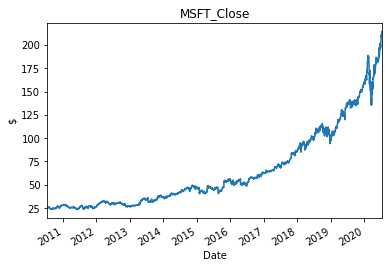

In [32]:
title='MSFT_Close'
ax=df['Close'].plot(figsize=(6,4), title=title)
ylabel='$'

ax.set(ylabel=ylabel)

In [33]:
df.index

DatetimeIndex(['2010-07-15', '2010-07-16', '2010-07-19', '2010-07-20',
               '2010-07-21', '2010-07-22', '2010-07-23', '2010-07-26',
               '2010-07-27', '2010-07-28',
               ...
               '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
               '2020-07-13', '2020-07-14'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

df=df.asfreq('B')
df.index

In [35]:
df.isnull().sum()

Close    92
dtype: int64

In [37]:
df=df.fillna(method='pad', limit=1)
df.isna().sum()

Close    0
dtype: int64

### The multiplicative decomposition of the dataset. Three components are shown: (a) trend, (b) seasonality, and (c) remainder component are shown below.

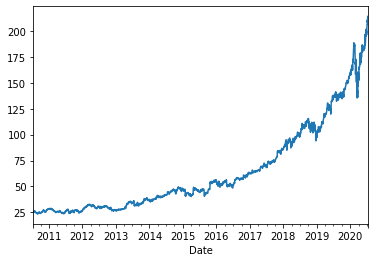

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(df['Close'])
results.observed.plot()

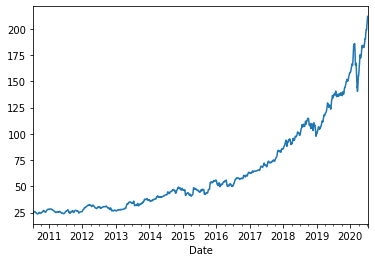

In [45]:
results.trend.plot()

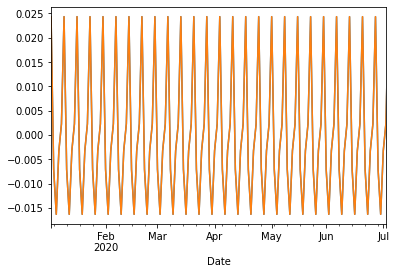

In [46]:
#results.seasonal.plot()
results.seasonal.plot(xlim=['2020-01-03','2020-07-02'])

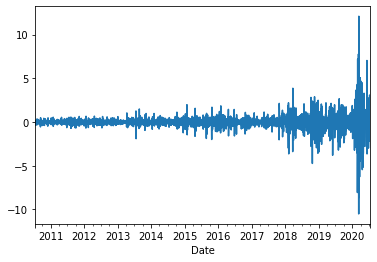

In [47]:
results.resid.plot()

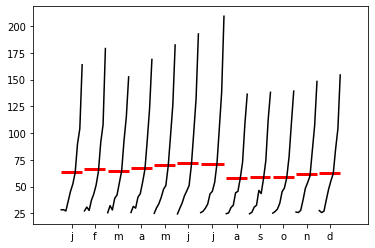

In [57]:
 # Average of monthly and quarterly stock prices over the last 10 years
    
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
dfM=df['Close'].resample(rule='M').mean()
month_plot(dfM);

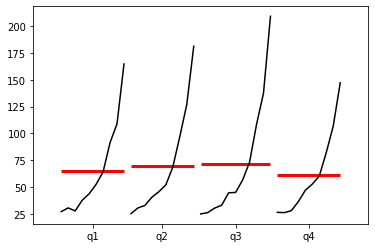

In [58]:
dfq=df['Close'].resample(rule='Q').mean()
quarter_plot(dfq);

In [98]:
# Split dataset; training and test set

len(df)
len(df)-60  #2549

train=df.iloc[:2549]
test=df.iloc[2549:]

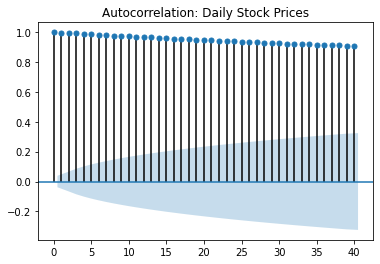

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

title = 'Autocorrelation: Daily Stock Prices'
lags = 40
plot_acf(df,title=title,lags=lags);

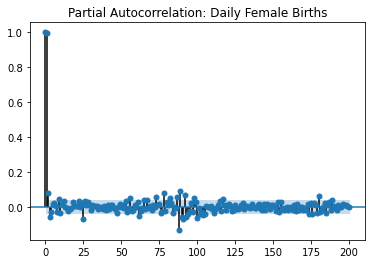

In [72]:
title='Partial Autocorrelation: Daily Female Births'
lags=200
plot_pacf(df,title=title,lags=lags);

## 4. Methodology and Results
<div style="text-align: justify">Three different methods were implemented. The first one is AutoRegressive Integrated Moving Average (ARIMA) model. The second one is Recurrent Neural Network (RNN) model and the third model is using Facebook’s Prophet. After building each prediction model using all the dataset except for the last 60 days, the last (or the latest) 60 days of data were used as a test set. 

In order to compare the results of each model, three common evaluation metrics were used; Mean Absolute Error (MAE), Mean Squared Error (MSE),Root Mean Squared Error (RMSE). Compared to MAE, MSE better shows larger errors by taking the squared value. However, because it is squared the residual, the units are also squared, and it makes hard to interpret.</div> 

## 4-1. SARIMA model
<div style="text-align: justify">The first method implemented is Seasonal AutoRegressive Integrated Moving Average (SARIMA). ARIMA models are denoted with three parameters p, d, and q (non-negative integers). The first part of ARIMA model is Autoregression(AR) denoted with parameter, p. Autoregression is a regression model that employs the dependent relationship between a current observation and observations from a previous period of time in order of p.</div>

In [51]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Finding pdq
auto_arima(df['Close'],seasonal=True, m=5).summary()

C:\Users\heyle\Anaconda3_2020\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\heyle\Anaconda3_2020\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\heyle\Anaconda3_2020\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\heyle\Anaconda3_2020\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\h

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2609
Model:             SARIMAX(3, 2, 3)x(1, 0, [1], 5)   Log Likelihood               -4536.318
Date:                             Wed, 28 Oct 2020   AIC                           9092.637
Time:                                     15:59:59   BIC                           9151.296
Sample:                                          0   HQIC                          9113.888
                                            - 2609                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.000      1.440      0.150      -0.000       0.001
ar.L1         -2.0944      0.016   -127.122      0.000      -2.127      -2.062
ar.L2         -1.4217      0.023    -60.604      0.000      -1.468      -1.376
ar.L3         -0.2705      0.009    -28.480      0.000      -0.289      -0.252
ma.L1          0.8101      0.015     54.319      0.000       0.781       0.839
ma.L2         -0.9462      0.004   -223.686      0.000      -0.954      -0.938
ma.L3         -0.8487      0.014    -60.772      0.000      -0.876      -0.821
ar.S.L5       -0.0362      0.084     -0.433      0.665      -0.200       0.128
ma.S.L5       -0.0551      0.086     -0.643      0.521      -0.223       0.113
sigma2         1.8873      0.016    115.471      0.000       1.855       1.919
===================================================================================
Ljung-Box (Q):                      194.41   Jarque-Bera (JB):             89089.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              25.41   Skew:                            -1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model=SARIMAX(train['Close'], order=(3,2,3), seasonal_order=(1, 0, 1, 5))

results=model.fit()
results.summary()

C:\Users\heyle\Anaconda3_2020\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 2579
Model:             SARIMAX(3, 2, 3)x(1, 0, [1], 5)   Log Likelihood               -4392.336
Date:                             Wed, 28 Oct 2020   AIC                           8802.672
Time:                                     16:01:55   BIC                           8855.362
Sample:                                 07-15-2010   HQIC                          8821.772
                                      - 06-02-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0117      0.018   -112.579      0.000      -2.047      -1.977
ar.L2         -1.3108      0.025    -51.671      0.000      -1.360      -1.261
ar.L3         -0.2219      0.011    -21.091      0.000      -0.242      -0.201
ma.L1          0.7385      0.015     47.736      0.000       0.708       0.769
ma.L2         -0.9421      0.003   -302.485      0.000      -0.948      -0.936
ma.L3         -0.7872      0.015    -51.761      0.000      -0.817      -0.757
ar.S.L5       -0.1533      0.052     -2.959      0.003      -0.255      -0.052
ma.S.L5        0.0137      0.054      0.253      0.800      -0.092       0.120
sigma2         1.7656      0.015    120.423      0.000       1.737       1.794
===================================================================================
Ljung-Box (Q):                      227.67   Jarque-Bera (JB):            103564.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              23.69   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

predicted=168.0882298, expected=173.520004
predicted=173.4435714, expected=171.419998
predicted=169.698037 , expected=174.550003
predicted=176.4780838, expected=174.050003
predicted=173.3623674, expected=169.809998
predicted=172.8254141, expected=177.429993
predicted=173.8426425, expected=179.21000700000002
predicted=179.6504989, expected=174.570007
predicted=175.4899331, expected=178.83999599999999
predicted=178.7238411, expected=180.759995
predicted=179.3930433, expected=182.53999299999998
predicted=181.779317 , expected=183.600006
predicted=184.0828451, expected=184.679993
predicted=184.2019889, expected=186.740005
predicted=186.011409 , expected=182.509995
predicted=183.4478086, expected=179.75
predicted=180.9469921, expected=180.529999
predicted=179.8801879, expected=183.16000400000001
predicted=182.8042913, expected=184.91000400000001
predicted=184.6459716, expected=183.630005
predicted=185.2634564, expected=185.66000400000001
predicted=184.999521 , expected=183.429993
predicted=

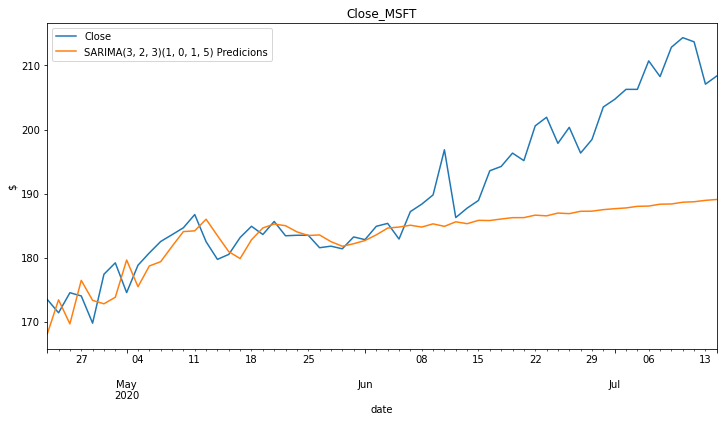

In [99]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3, 2, 3)(1, 0, 1, 5) Predicions')

for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Close'][i]}")

         
title = 'Close_MSFT'
ylabel='$'
xlabel='date'

ax = test['Close'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [100]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close'], predictions)
print(f'SARIMA(3, 2, 3)(1, 0, 1, 5) MSE Error: {error:11.10}')
          
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Close'], predictions)
print(f'SARIMA(3, 2, 3)(1, 0, 1, 5) RMSE Error: {error:11.10}')

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['Close'], predictions)
print(f'SARIMA(3, 2, 3)(1, 0, 1, 5) MAE Error: {error:11.10}')

SARIMA(3, 2, 3)(1, 0, 1, 5) MSE Error: 106.5055917
SARIMA(3, 2, 3)(1, 0, 1, 5) RMSE Error: 10.32015463
SARIMA(3, 2, 3)(1, 0, 1, 5) MAE Error: 7.224209734


## 4-2. Recurrent Neural Network
<div style="text-align: justify">Recurrent Neural Network (RNN) is specifically designed to work with sequence data such as time series data, sentences, or music etc. One of common issues of RNN is that it tends to start overwriting the weights of the very beginning inputs especially in a really large sequence of data. Therefore, in order to make balance both the short term memory of the networks which is recently trained on and the long term memory that is very first trained on, LSTM (Long Short-Term Memory) memory cell was created to help this RNN network issue.</div>   

In [101]:
# scale data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [102]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [103]:
from keras.preprocessing.sequence import TimeseriesGenerator
#define generator
n_input=len(test)
n_features=1
generator =TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [104]:
from keras.models import load_model
new_model=load_model('RNN2.h5')

C:\Users\heyle\Anaconda3_2020\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [105]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 150)           91200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                40200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 132,701
Trainable params: 132,701
Non-trainable params: 0
_________________________________________________________________


In [106]:
#Evaluate on test data
first_eval_batch=scaled_train[-len(test):]
first_eval_batch=first_eval_batch.reshape((1, n_input, n_features))

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = new_model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [109]:
true_predictions=scaler.inverse_transform(test_predictions)
test['Predictions']=true_predictions
test

C:\Users\heyle\Anaconda3_2020\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,Predictions
Date,,
2020-04-22,173.520004,174.942258
2020-04-23,171.419998,175.693086
2020-04-24,174.550003,176.346247
2020-04-27,174.050003,176.931118
2020-04-28,169.809998,177.469623
2020-04-29,177.429993,177.978070
2020-04-30,179.210007,178.469007
2020-05-01,174.570007,178.951159
2020-05-04,178.839996,179.430435


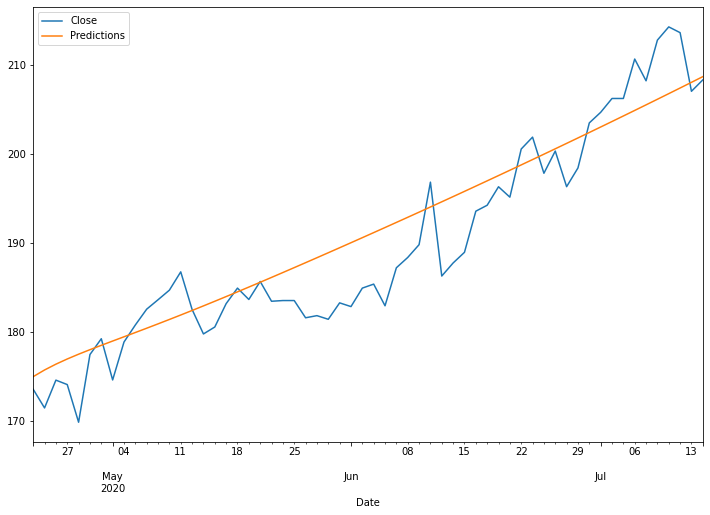

In [110]:
test.plot(figsize=(12,8))

In [115]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close'], test['Predictions'])
print(f'MSE Error: {error:11.10}')
          
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Close'],test['Predictions'])
print(f'RMSE Error: {error:11.10}')

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['Close'], test['Predictions'])
print(f'MAE Error: {error:11.10}')

MSE Error: 18.22071752
RMSE Error: 4.268573242
MAE Error: 3.527712492


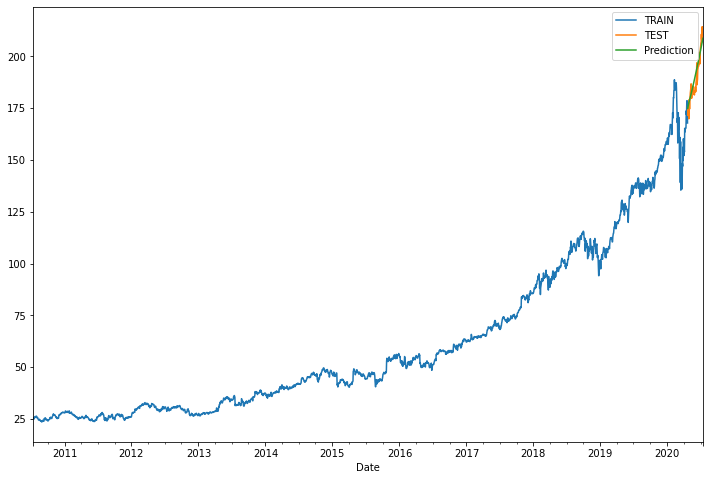

In [116]:
train['Close'].plot(legend=True,label='TRAIN')
test['Close'].plot(legend=True,label='TEST',figsize=(12,8))
test['Predictions'].plot(legend=True,label='Prediction', figsize=(12,8))

In [117]:
# Forecasting the next 20 days
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(80):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = new_model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [127]:
Pred_Forecasting=pd.DataFrame(test_predictions[60:])
Pred_Forecasting=scaler.inverse_transform(Pred_Forecasting)
Pred_Forecasting=pd.DataFrame(Pred_Forecasting)
Pred_Forecasting

,0
0,209.362532
1,210.009498
2,210.659477
3,211.311525
4,211.965996
5,212.622633
6,213.281752
7,213.943451
8,214.607613
9,215.274138


In [128]:
Date_Forecasting=pd.date_range(start='2020-07-15', periods=20, freq='B')
Date_Forecasting

DatetimeIndex(['2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-10', '2020-08-11'],
              dtype='datetime64[ns]', freq='B')

In [129]:

Pred_Forecasting['Pred_Forecasting']=Pred_Forecasting
Pred_Forecasting['Date']=Date_Forecasting

Pred_Forecasting

,0,Pred_Forecasting,Date
0,209.362532,209.362532,2020-07-15
1,210.009498,210.009498,2020-07-16
2,210.659477,210.659477,2020-07-17
3,211.311525,211.311525,2020-07-20
4,211.965996,211.965996,2020-07-21
5,212.622633,212.622633,2020-07-22
6,213.281752,213.281752,2020-07-23
7,213.943451,213.943451,2020-07-24
8,214.607613,214.607613,2020-07-27
9,215.274138,215.274138,2020-07-28


In [130]:
df_Forecasting=Pred_Forecasting[['Date', 'Pred_Forecasting']]
df2=df_Forecasting.set_index('Date')

(13044.0, 13207.0)

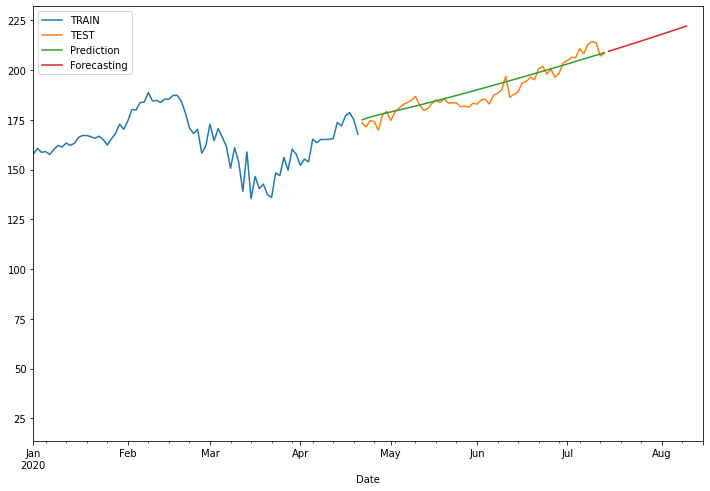

In [131]:
train['Close'].plot(legend=True,label='TRAIN')
test['Close'].plot(legend=True,label='TEST',figsize=(12,8))
test['Predictions'].plot(legend=True,label='Prediction', figsize=(12,8))
df2['Pred_Forecasting'].plot(legend=True, label='Forecasting', figsize=(12,8))
plt.xlim('2020-01-01','2020-08-15')

## 4-3. Facebook's Prophet
<div style="text-align: justify">Prophet is an open source time series forecasting model from Facebook and it is designed to deal with the common features of business time series (Taylor and Letham, 2017). The Prophet procedure is an additive regression model with four components defined by equation below. The first component is a piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.  Second component is a yearly seasonal component modeled using Fourier series. Third component is holiday-effect using dummy variables and the last component is any noise. 

$y(t)\ =\ g(t)\ +\ s(t)\ +\ h(t)\ +\ \varepsilon_t $     
where,
<br>
g(t) = the trend function of non-periodic changes
<br>
s(t) = periodic changes
<br>
h(t) =  the effects of holidays 
<br>
εt = any idiosyncratic changes
<br>
Training and test dataset are same with one used for previous methods. Last 60 days of data were used for test set.
</div>

In [141]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [158]:
df=df.reset_index(level=['Date'])
df.head()

,Date,Close
0,2010-07-15,25.510000
1,2010-07-16,24.889999
2,2010-07-19,25.230000
3,2010-07-20,25.480000
4,2010-07-21,25.120001


In [156]:
df.columns=['ds','y']
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2010-07-15,25.510000
1,2010-07-16,24.889999
2,2010-07-19,25.230000
3,2010-07-20,25.480000
4,2010-07-21,25.120001


In [144]:
len(df)-60  #2549
train=df.iloc[:2549]
test=df.iloc[2549:]

In [145]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=60, freq='B')
forecast=m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [146]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 19 columns):
ds                            2609 non-null datetime64[ns]
trend                         2609 non-null float64
yhat_lower                    2609 non-null float64
yhat_upper                    2609 non-null float64
trend_lower                   2609 non-null float64
trend_upper                   2609 non-null float64
additive_terms                2609 non-null float64
additive_terms_lower          2609 non-null float64
additive_terms_upper          2609 non-null float64
weekly                        2609 non-null float64
weekly_lower                  2609 non-null float64
weekly_upper                  2609 non-null float64
yearly                        2609 non-null float64
yearly_lower                  2609 non-null float64
yearly_upper                  2609 non-null float64
multiplicative_terms          2609 non-null float64
multiplicative_terms_lower    2609 non-null float64
mu

In [147]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-15,25.386084,20.363066,31.794989,25.386084,25.386084,0.777023,0.777023,0.777023,0.005555,0.005555,0.005555,0.771469,0.771469,0.771469,0.0,0.0,0.0,26.163107
1,2010-07-16,25.388449,20.707649,31.445136,25.388449,25.388449,0.911573,0.911573,0.911573,0.051928,0.051928,0.051928,0.859644,0.859644,0.859644,0.0,0.0,0.0,26.300021
2,2010-07-19,25.395543,21.413420,31.763963,25.395543,25.395543,1.009613,1.009613,1.009613,-0.059329,-0.059329,-0.059329,1.068942,1.068942,1.068942,0.0,0.0,0.0,26.405156
3,2010-07-20,25.397908,21.422096,32.262937,25.397908,25.397908,1.078658,1.078658,1.078658,-0.038030,-0.038030,-0.038030,1.116689,1.116689,1.116689,0.0,0.0,0.0,26.476566
4,2010-07-21,25.400272,21.052333,32.270784,25.400272,25.400272,1.107885,1.107885,1.107885,-0.044310,-0.044310,-0.044310,1.152196,1.152196,1.152196,0.0,0.0,0.0,26.508158


In [148]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2604,2020-07-08,171.305921,165.867526,177.094670,171.082126,171.537777,0.063561,0.063561,0.063561,-0.044310,-0.044310,-0.044310,0.107871,0.107871,0.107871,0.0,0.0,0.0,171.369481
2605,2020-07-09,171.405214,166.300423,177.221467,171.176628,171.643611,0.214956,0.214956,0.214956,0.005555,0.005555,0.005555,0.209401,0.209401,0.209401,0.0,0.0,0.0,171.620169
2606,2020-07-10,171.504507,166.328301,177.352985,171.271330,171.747981,0.365845,0.365845,0.365845,0.051928,0.051928,0.051928,0.313917,0.313917,0.313917,0.0,0.0,0.0,171.870352
2607,2020-07-13,171.802385,166.730226,177.758957,171.555033,172.074174,0.567455,0.567455,0.567455,-0.059329,-0.059329,-0.059329,0.626784,0.626784,0.626784,0.0,0.0,0.0,172.369840
2608,2020-07-14,171.901678,166.479542,177.777704,171.642724,172.183788,0.686666,0.686666,0.686666,-0.038030,-0.038030,-0.038030,0.724697,0.724697,0.724697,0.0,0.0,0.0,172.588344


In [149]:
pd.plotting.register_matplotlib_converters()

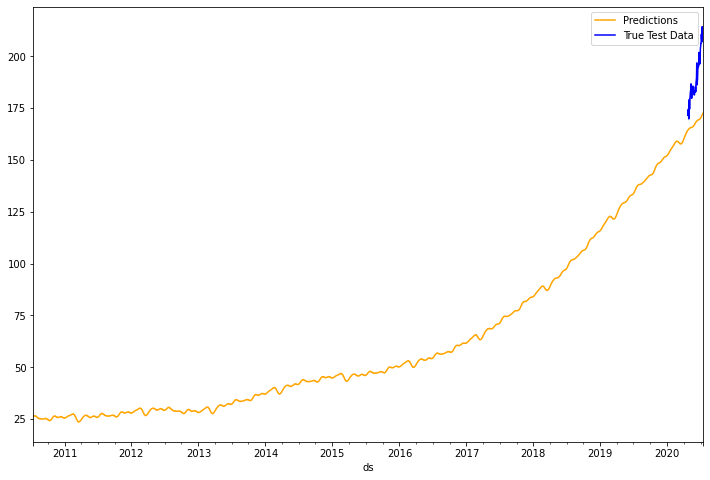

In [150]:
ax=forecast.plot(x='ds', y='yhat', label='Predictions',legend=True, figsize=(12,8),color='orange')
#test.plot(x='ds', y='y',label='True Test Data',legend=True, ax=ax, xlim=('2020-05-20','2020-07-14'))
test.plot(x='ds', y='y',label='True Test Data',legend=True, ax=ax, color='blue')

(160.0, 220.0)

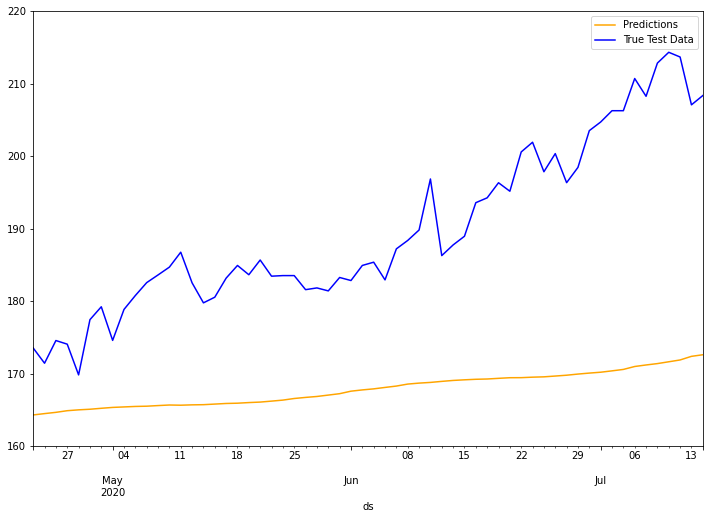

In [151]:
import matplotlib.pyplot as plt
ax=forecast.plot(x='ds', y='yhat', label='Predictions',legend=True, figsize=(12,8),color='orange')
#test.plot(x='ds', y='y',label='True Test Data',legend=True, ax=ax, xlim=('2020-05-20','2020-07-14'))
test.plot(x='ds', y='y',label='True Test Data',legend=True, ax=ax, color='blue')
plt.xlim('2020-04-22','2020-07-14')
plt.ylim(160, 220)

In [153]:
predictions=forecast.iloc[-60:]['yhat']

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['y'], predictions)
print(f'Prophet MAE Error: {error:11.10}')

from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['y'], predictions)
print(f'Prophet MSE Error: {error:11.10}')
          
from statsmodels.tools.eval_measures import rmse

error = rmse(test['y'], predictions)
print(f'Prophet RMSE Error: {error:11.10}')
        


Prophet MAE Error: 21.85802069
Prophet MSE Error: 567.0773063
Prophet RMSE Error: 23.81338502


## 5. Summary of results

Model evaluation metrics from all three methods

|Result	|     Method 1 (SARIMA)|     Method2 (RNN)|     Method3 (Prophet)|
|-	|-	|-	|-	|
|MAE| 7.2 | 3.5	|  21.9	|  
|MSE|  106.5|18.2  	|567.1|  	
|RMSE|  10.3	|4.3  	|23.8  	|  	
<br>

The last 60 days of data were used as a test set and three model evaluation metrics were used: mean absolute error, mean squared error, and root mean squared error. Even though the Autoregressive Integrated Moving Average (ARIMA) model has been widely used, it cannot capture nonlinear patterns. RNN model shows the best result compared to other two models and accurate prediction models could provide profitable investment decisions.